In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

diabetes = pd.read_csv("diabetes.csv")

print(diabetes.info())
diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             764 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       764 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       766 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 54.1+ KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,764.000000,768.000000,768.000000,764.000000,762.000000,766.000000
mean,3.845052,120.894531,69.058901,20.536458,79.799479,31.958246,0.472949,33.229765
std,3.369578,31.972618,19.383024,15.952218,115.244002,7.864874,0.332197,11.767328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.628500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [98]:
diabetes['Outcome'] = (diabetes['Outcome'] == 'POS').astype(int)
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0             35        0  33.6   
1            1       85           66.0             29        0  26.6   
2            8      183           64.0              0        0  23.3   
3            1       89           66.0             23       94  28.1   
4            0      137           40.0             35      168  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1  


In [99]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


tf.random.set_seed(42)
tf.keras.backend.clear_session()
X_train_full, X_test, y_train_full, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.1)
valid_size = int(len(X_train_full.index)*0.1) #calculating 20% of full training set, so the validation set is equal to that value
X_train, y_train = X_train_full[:-valid_size], y_train_full[:-valid_size]
X_valid, y_valid = X_train_full[-valid_size:], y_train_full[-valid_size:]


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │         2,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,601 (717.19 KB)

 Trainable params: 183,601 (717.19 KB)

 Non-trainable params: 0 (0.00 B)

None


In [100]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

In [101]:
history = model.fit(X_train_full, y_train_full, epochs=30, verbose=2)

Epoch 1/30
22/22 - 0s - 10ms/step - accuracy: 0.6411 - loss: 0.7469
Epoch 2/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6800
Epoch 3/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6732
Epoch 4/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6678
Epoch 5/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6635
Epoch 6/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6601
Epoch 7/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6573
Epoch 8/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6552
Epoch 9/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6534
Epoch 10/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6520
Epoch 11/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6509
Epoch 12/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6501
Epoch 13/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6494
Epoch 14/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - loss: 0.6488
Epoch 15/30
22/22 - 0s - 2ms/step - accuracy: 0.6512 - l

# Conclusions
The dataset is very small, and the above cell shows that it is far from enough for a neural network to be worth using, so I will opt for RandomForestClassifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
print(cross_val_score(dummy_clf, X_train_full, y_train_full, cv=3, scoring = 'accuracy'))

forest = RandomForestClassifier(n_estimators=500, random_state=42)
cross_val_score(forest, X_train_full, y_train_full, cv=3, scoring='accuracy')

[0.64935065 0.65217391 0.65217391]


array([0.79220779, 0.78695652, 0.73478261])

In [103]:
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest, X_train_full, y_train_full, cv=3)
y_train_pred_dummy = cross_val_predict(dummy_clf, X_train_full, y_train_full, cv=3)

print(accuracy_score(y_train_full, y_train_pred))
print(precision_score(y_train_full, y_train_pred))
print(accuracy_score(y_train_full, y_train_pred_dummy))
#print(precision_score(y_train_full, y_train_pred_dummy)) dummy always predicts negative

0.7713458755426917
0.6966824644549763
0.6512301013024602


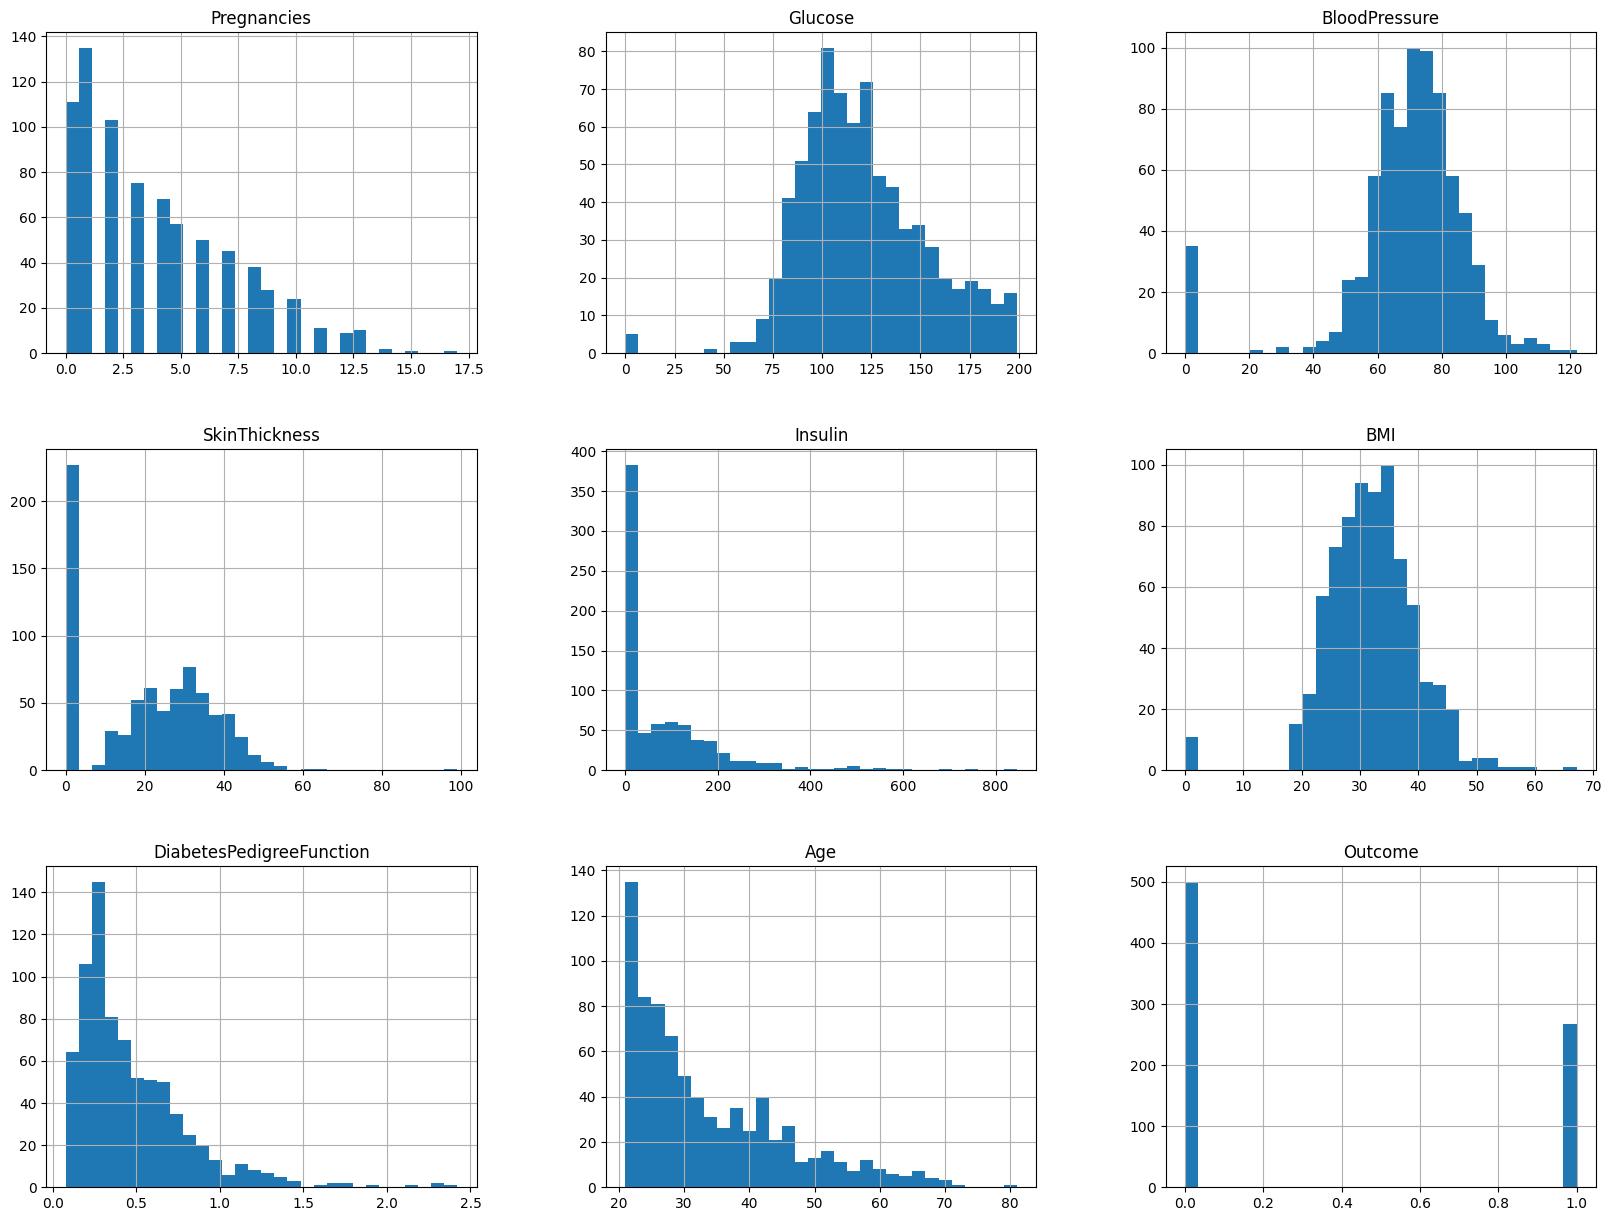

In [104]:
diabetes.hist(figsize=(20, 15), bins=30)
plt.show()

Since only corpses could have 0 glucose, skin thickness, blood pressure, insulin, BMI, I assume these are equivalent to null values

In [105]:
from sklearn.impute import SimpleImputer

diabetes_imputed = diabetes.copy(deep=True)

imputer_nan = SimpleImputer(strategy='median')
diabetes_imputed = pd.DataFrame(imputer_nan.fit_transform(diabetes_imputed), columns=imputer_nan.get_feature_names_out())
print(diabetes_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB
None


Got rid of NaNs, now time for 0s

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
imputer_0 = SimpleImputer(missing_values = 0, strategy = 'median')
fake_transf = FunctionTransformer(feature_names_out='one-to-one')

col_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
untouched_cols = [col for col in diabetes_imputed if not col in col_to_impute]
col_imputer = ColumnTransformer([('o_0', imputer_0, col_to_impute), ('remaining', fake_transf, untouched_cols)], verbose_feature_names_out=False)


diabetes_imputed = pd.DataFrame(col_imputer.fit_transform(diabetes_imputed), columns=col_imputer.get_feature_names_out())

print(diabetes.describe())
diabetes_imputed.describe()


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     764.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.058901      20.536458   79.799479   
std       3.369578   31.972618      19.383024      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  764.000000                762.000000  766.000000  768.000000  
mean    31.958246                  0.472949   33.229765    0.348958  
std      7.864874                  0.332197   11.767328    0.476951  
min      0.000000                  

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.355469,29.108073,140.671875,32.418229,3.845052,0.472164,33.218750,0.348958
std,30.438286,12.069548,8.791221,86.383060,6.831882,3.369578,0.331014,11.753956,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.000000,0.078000,21.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.575000,1.000000,0.244750,24.000000,0.000000
50%,117.000000,72.000000,29.000000,125.000000,32.100000,3.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.500000,6.000000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,17.000000,2.420000,81.000000,1.000000


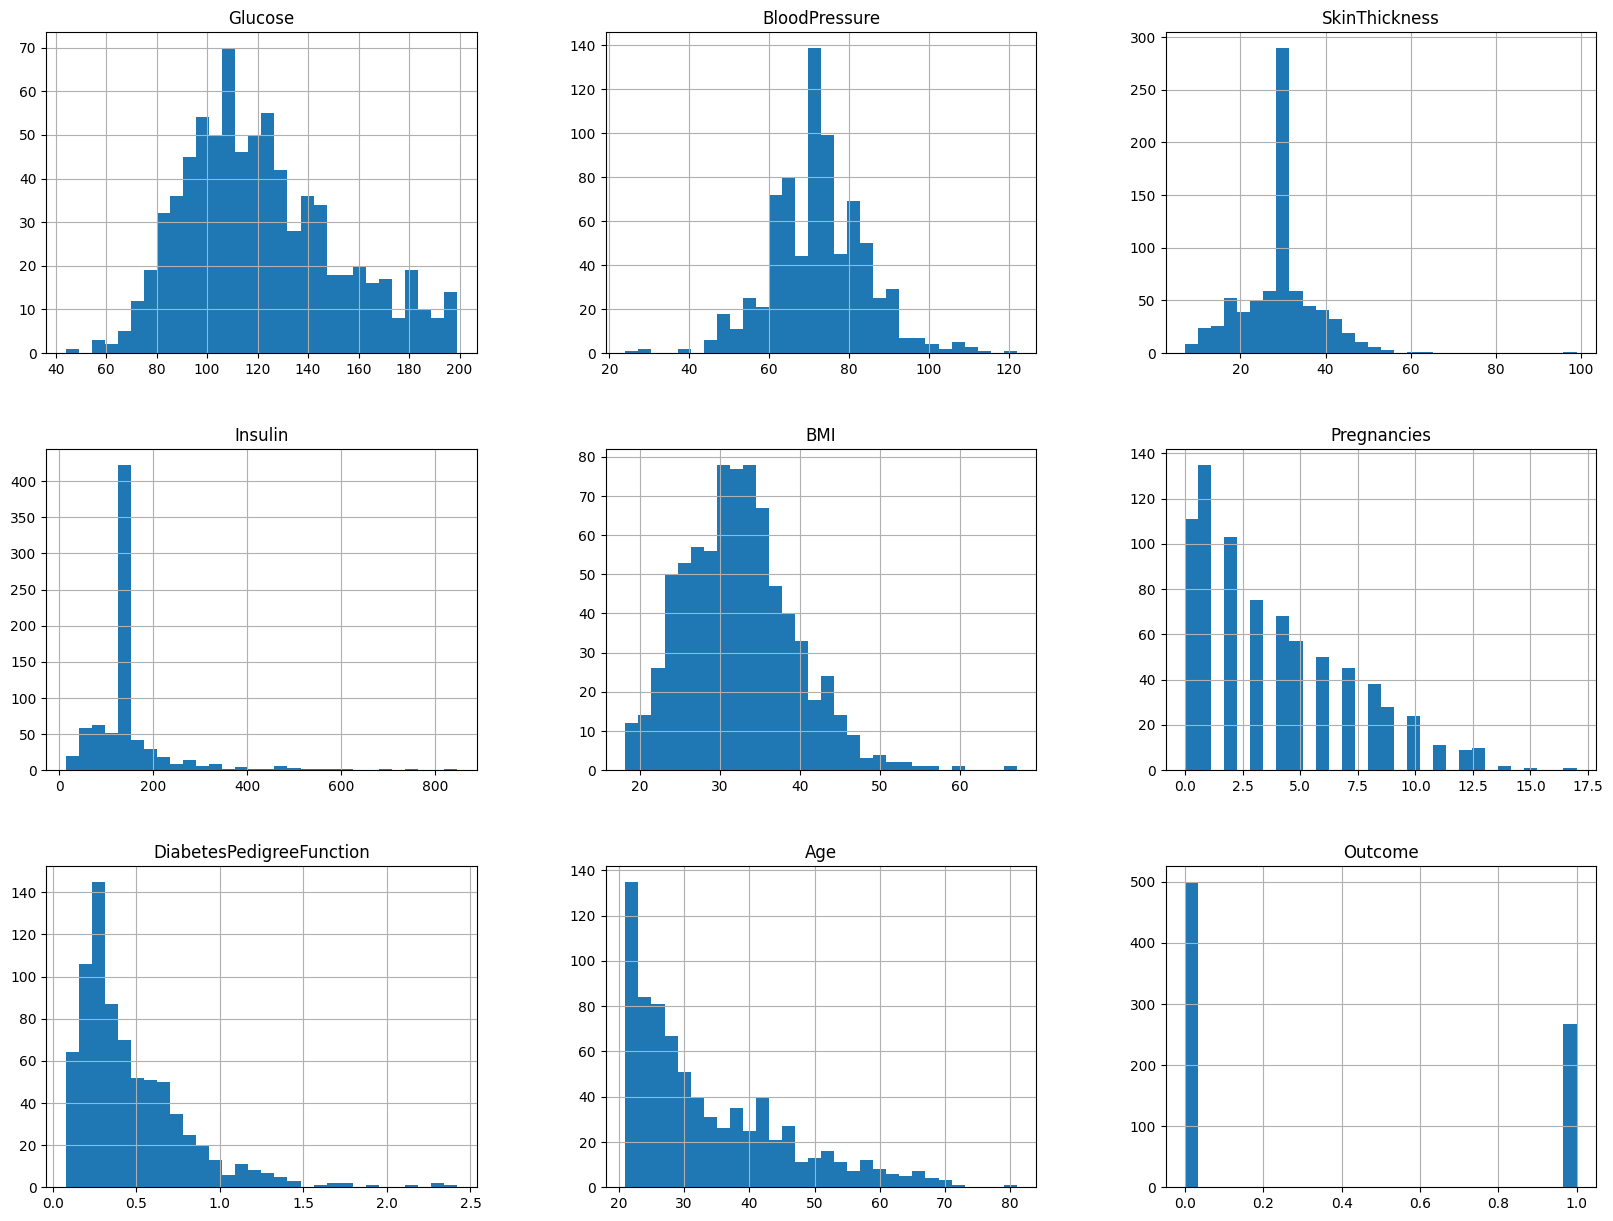

In [107]:
diabetes_imputed.hist(figsize=(20, 15), bins=30)
plt.show()

In [108]:
corr_matrix = diabetes_imputed.corr()
corr_df = pd.DataFrame(corr_matrix)
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.317821
Age                         0.239863
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.172609
BloodPressure               0.163915
Name: Outcome, dtype: float64

In [109]:
#Works THE EXACT SAME AS corr(pearson) - left to remember
from scipy.stats import pointbiserialr

corrs = {col: pointbiserialr(diabetes_imputed[col], diabetes_imputed['Outcome']).correlation for col in diabetes_imputed if col != 'Outcome'}


In [110]:
for i in corr_df:
    print(i)
    print(corr_df[i].sort_values(ascending=False))

Glucose
Glucose                     1.000000
Outcome                     0.492782
Insulin                     0.419451
Age                         0.268240
BMI                         0.229317
BloodPressure               0.216951
SkinThickness               0.192615
DiabetesPedigreeFunction    0.137707
Pregnancies                 0.128213
Name: Glucose, dtype: float64
BloodPressure
BloodPressure               1.000000
Age                         0.320873
BMI                         0.280073
Glucose                     0.216951
Pregnancies                 0.209798
SkinThickness               0.191839
Outcome                     0.163915
Insulin                     0.045910
DiabetesPedigreeFunction   -0.002589
Name: BloodPressure, dtype: float64
SkinThickness
SkinThickness               1.000000
BMI                         0.539368
Outcome                     0.214873
Glucose                     0.192615
BloodPressure               0.191839
Insulin                     0.155610
Age       

In [117]:
diabetes_extended = diabetes_imputed.copy(deep=True)#.drop('Outcome', axis=1)

threshold = 0.24

trait_columns = (diabetes_extended.drop('Outcome', axis=1)).columns
for i in trait_columns:
    for j in trait_columns:
        if i!=j and j+'/'+i not in diabetes_extended and j+'*'+i not in diabetes_extended:
            att1 = i+'/'+j
            att2 = i+'*'+j

            diabetes_extended[att1] = diabetes_extended[i]/diabetes_extended[j]
            diabetes_extended[att2] = diabetes_extended[i]*diabetes_extended[j]

            corr_matrix = abs(diabetes_extended.corr()['Outcome'])

            if corr_matrix[att1] <= corr_matrix[i] or corr_matrix[att1] <= corr_matrix[j] or corr_matrix[att1] < threshold:
                diabetes_extended.drop(att1, axis=1, inplace=True)
            if corr_matrix[att2] <= corr_matrix[i] or corr_matrix[att2] <= corr_matrix[j] or corr_matrix[att2] < threshold:
                diabetes_extended.drop(att2, axis=1, inplace=True)


inf_cols = diabetes_extended.columns[diabetes_extended.isin([-np.inf, np.inf]).any()]
print(len(inf_cols))
diabetes_extended.drop(columns=inf_cols, inplace=True, axis=1)


print(diabetes_extended.describe())
diabetes_extended.corr()['Outcome'].sort_values(ascending=False)

0
          Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   121.656250      72.355469      29.108073  140.671875   32.418229   
std     30.438286      12.069548       8.791221   86.383060    6.831882   
min     44.000000      24.000000       7.000000   14.000000   18.200000   
25%     99.750000      64.000000      25.000000  121.500000   27.575000   
50%    117.000000      72.000000      29.000000  125.000000   32.100000   
75%    140.250000      80.000000      32.000000  127.250000   36.500000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       Pregnancies  DiabetesPedigreeFunction         Age     Outcome  \
count   768.000000                768.000000  768.000000  768.000000   
mean      3.845052                  0.472164   33.218750    0.348958   
std       3.369578                  0.331014   11.753956    0.476951   
min       0.000000                

Outcome                                 1.000000
Glucose*BMI                             0.524784
Glucose                                 0.492782
BMI*Age                                 0.365282
BMI                                     0.317821
Insulin*Pregnancies                     0.284800
SkinThickness*Age                       0.282879
Insulin*Age                             0.280390
Pregnancies*DiabetesPedigreeFunction    0.260402
BloodPressure*Age                       0.249819
SkinThickness*Insulin                   0.242373
SkinThickness*Pregnancies               0.241619
BloodPressure*SkinThickness             0.240763
Age                                     0.239863
Pregnancies                             0.221898
SkinThickness                           0.214873
Insulin                                 0.203790
DiabetesPedigreeFunction                0.172609
BloodPressure                           0.163915
Name: Outcome, dtype: float64

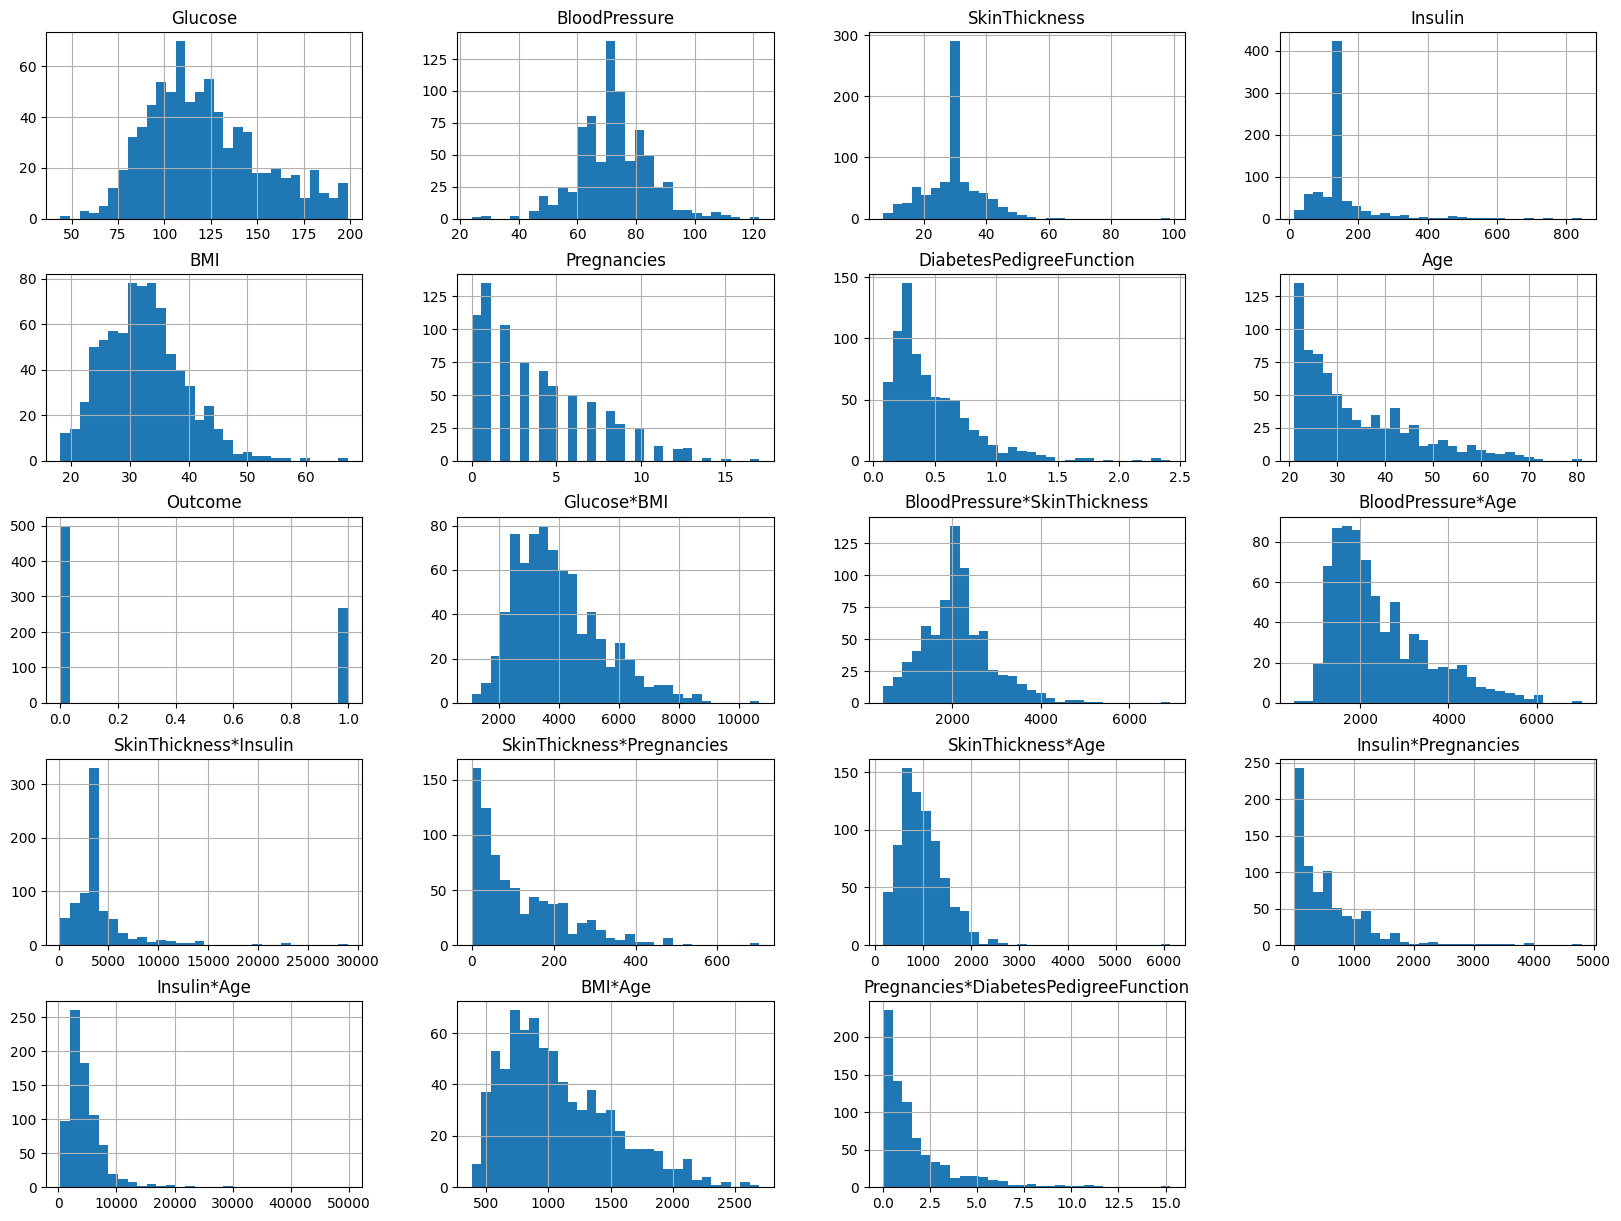

In [118]:
diabetes_extended.hist(figsize=(20, 15), bins=30)
plt.show()